<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [ ]:
# loading the data: Wholesale customers data
Wholesale = pd.read_csv('../Wholesale customers data.csv')
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
# What does each column mean?
Wholesale.info()  # Provides column names, data types, and counts of non-null values
Wholesale.head()  # Displays the first few rows of the dataset

# NO data to convert as integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


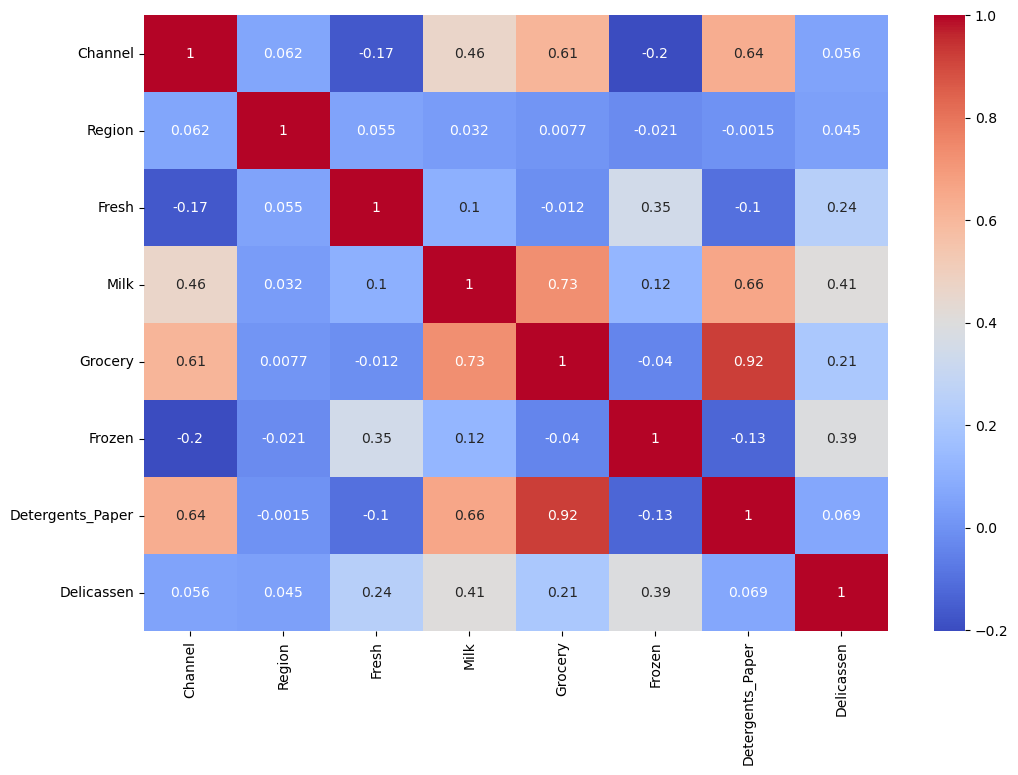

In [ ]:
# Correlation
corr_matrix = Wholesale.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Missing data
missing_data = Wholesale.isnull().sum()
print(missing_data)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# Outliners to remove..
Wholesale.describe()  # Gives an overview of the basic statistics


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


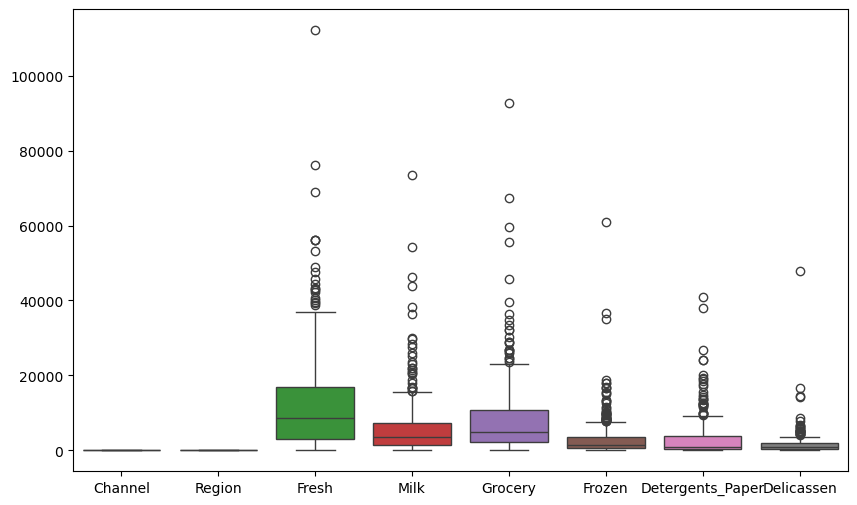

In [ ]:
# Outliners to remove..
plt.figure(figsize=(10, 6))
sns.boxplot(data=Wholesale)
plt.show()

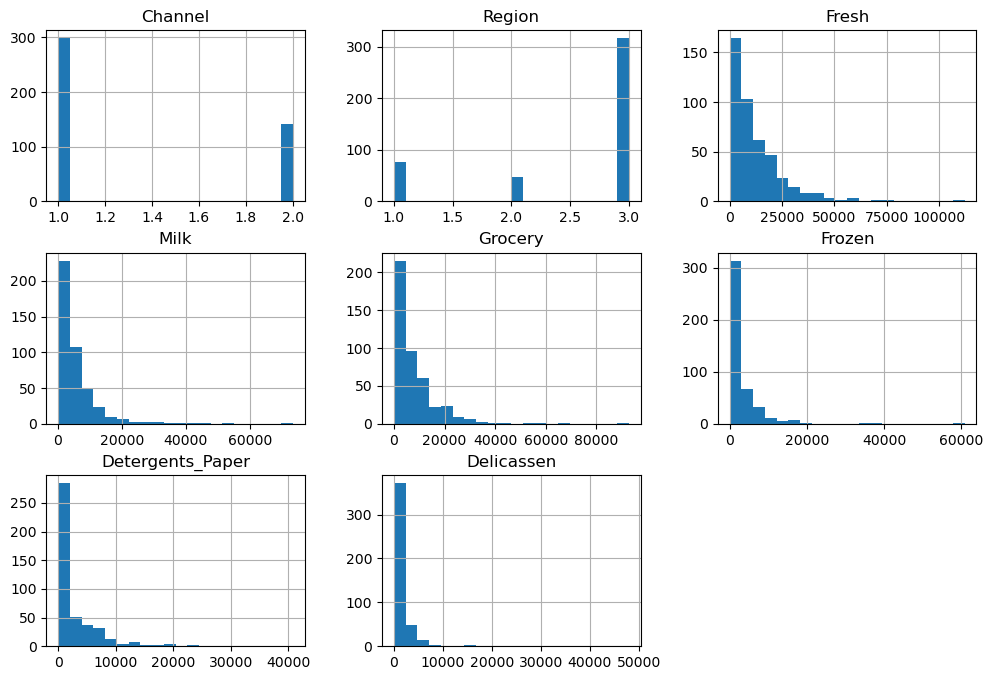

In [ ]:
# Data Distribution
Wholesale.hist(figsize=(12, 8), bins=20)
plt.show()


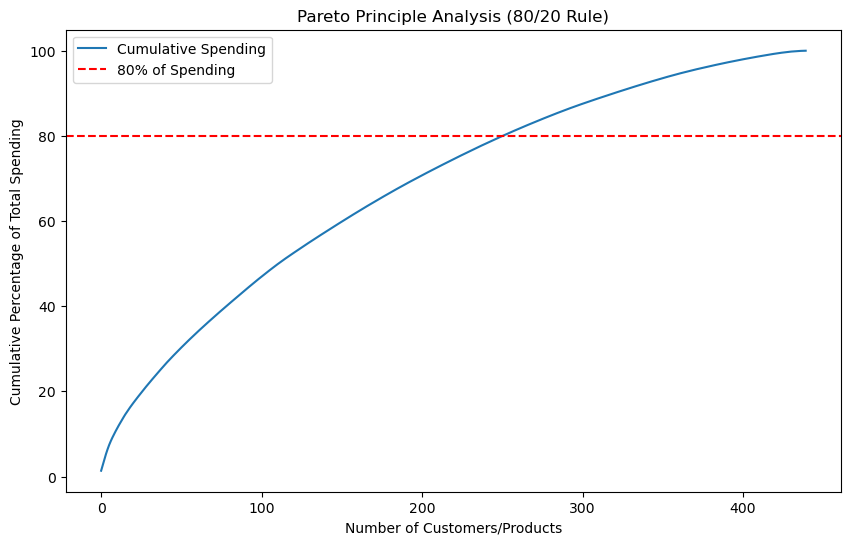

57.05% of customers/products account for 80% of total spending.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into a pandas dataframe called 'df'
# Calculate the total sales for each column (e.g., 'Fresh', 'Milk', 'Grocery')
Wholesale['Total_Spending'] = Wholesale[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

# Sort the data by total spending in descending order
Wholesale_sorted = Wholesale.sort_values(by='Total_Spending', ascending=False)

# Calculate the cumulative percentage of total spending
Wholesale_sorted['Cumulative_Spending'] = Wholesale_sorted['Total_Spending'].cumsum()
Wholesale_sorted['Cumulative_Percentage'] = 100 * Wholesale_sorted['Cumulative_Spending'] / Wholesale_sorted['Total_Spending'].sum()

# Plot the cumulative percentage to visualize Pareto Principle
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Wholesale_sorted)), Wholesale_sorted['Cumulative_Percentage'], label='Cumulative Spending')
plt.axhline(80, color='r', linestyle='--', label='80% of Spending')
plt.xlabel('Number of Customers/Products')
plt.ylabel('Cumulative Percentage of Total Spending')
plt.title('Pareto Principle Analysis (80/20 Rule)')
plt.legend()
plt.show()

# Check what percentage of customers/products account for 80% of the total spending
pareto_cutoff = Wholesale_sorted[Wholesale_sorted['Cumulative_Percentage'] <= 80].shape[0]
total_customers = Wholesale_sorted.shape[0]
pareto_percentage = (pareto_cutoff / total_customers) * 100

print(f"{pareto_percentage:.2f}% of customers/products account for 80% of total spending.")

    

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# No need to clean the data, all columns in numerical

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to be scaled
columns_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
customers_scale = scaler.fit_transform(Wholesale[columns_to_scale])

# Convert the scaled data back into a DataFrame for better readability
customers_scale = pd.DataFrame(customers_scale, columns=columns_to_scale)

# Preview the scaled data
print(customers_scale.head())



      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Initialize the K-Means model with a specific number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data
kmeans.fit(customers_scale)

# Retrieve the cluster labels
labels = kmeans.labels_

# Add the cluster labels as a new column in the original dataframe (Wholesale)
Wholesale['labels'] = labels

# Preview the dataset with the added 'labels' column
print(Wholesale.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total_Spending  labels  
0        1338           34112       0  
1        1776           33266       0  
2        7844           36610       0  
3        1788           27381       0  
4        5185           46100       1  


### Looking to the elbow we can choose 2 like the correct number of clusters

In [ ]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [ ]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

clean_customers['Label'] = clusters

NameError: name 'clean_customers' is not defined

Count the values in `labels`.

In [ ]:
# Your code here:

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Import DBSCAN from sklearn
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model with epsilon = 0.5
dbscan = DBSCAN(eps=0.5)

# Fit the model to the scaled data
dbscan.fit(customers_scale)

# Retrieve the cluster labels
dbscan_labels = dbscan.labels_

# Add the DBSCAN cluster labels as a new column in the original dataframe (Wholesale)
Wholesale['labels_DBSCAN'] = dbscan_labels

# Preview the dataset with both K-Means and DBSCAN labels
print(Wholesale[['labels', 'labels_DBSCAN']].head())


   labels  labels_DBSCAN
0       0              0
1       0              0
2       0             -1
3       0              0
4       1             -1


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

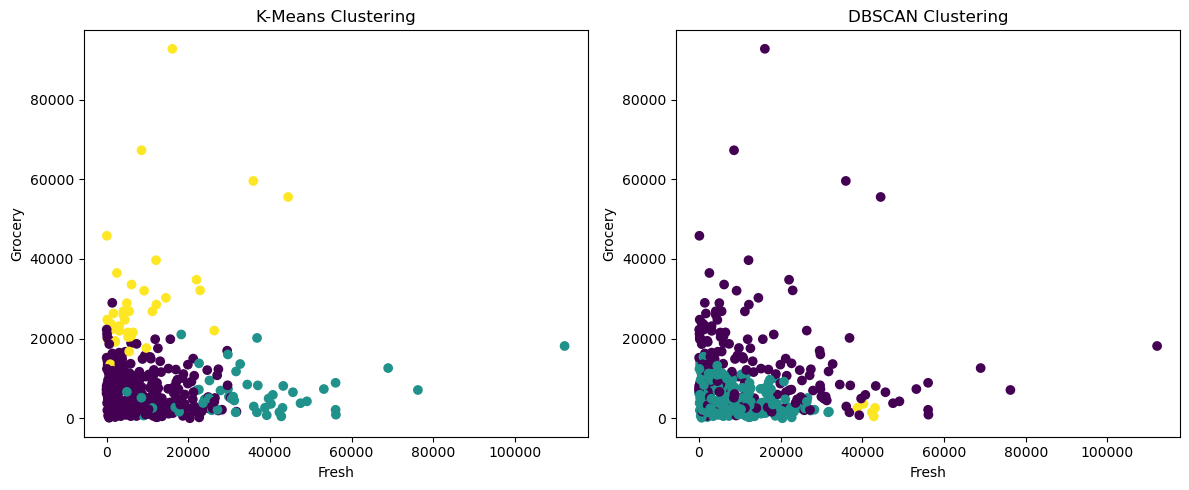

In [ ]:
# Scatter plot to compare K-Means and DBSCAN clusters (e.g., Fresh vs Grocery)
plt.figure(figsize=(12, 5))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(Wholesale['Fresh'], Wholesale['Grocery'], c=Wholesale['labels'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Fresh')
plt.ylabel('Grocery')

# DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(Wholesale['Fresh'], Wholesale['Grocery'], c=Wholesale['labels_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Fresh')
plt.ylabel('Grocery')

plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

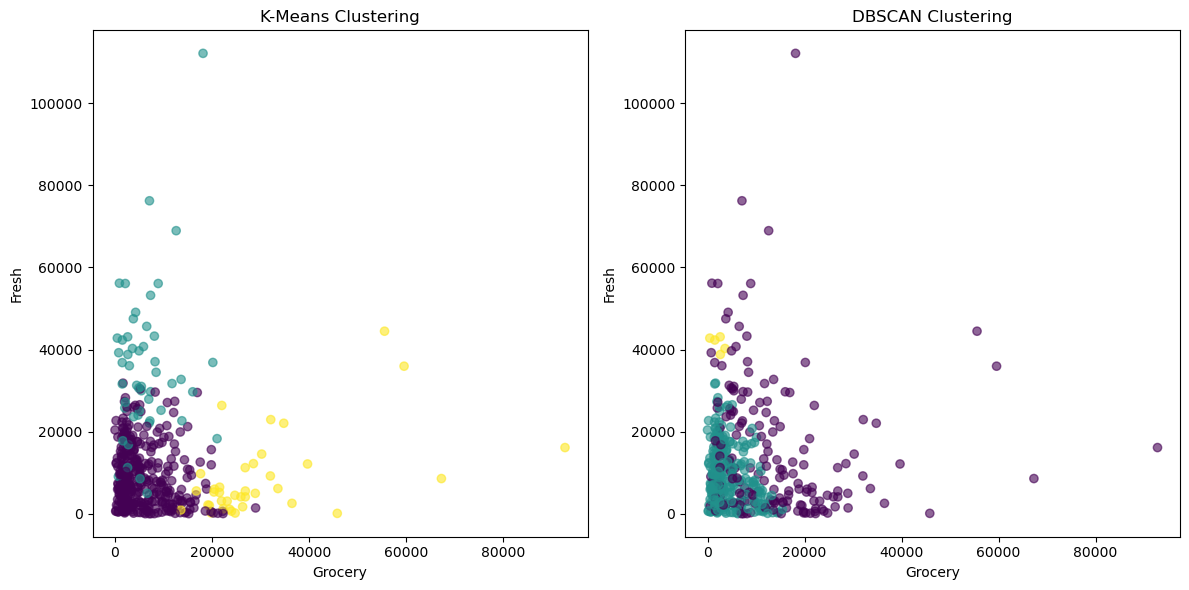

In [ ]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot: K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(Wholesale['Grocery'], Wholesale['Fresh'], c=Wholesale['labels'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# Second subplot: DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(Wholesale['Grocery'], Wholesale['Fresh'], c=Wholesale['labels_DBSCAN'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

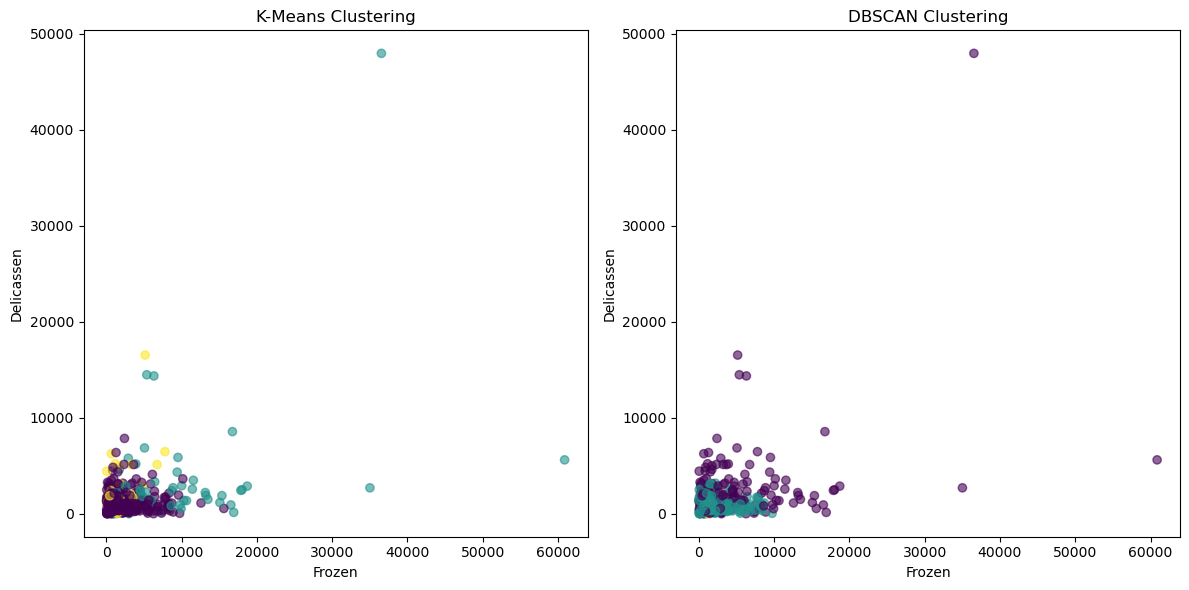

In [ ]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot: K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(Wholesale['Frozen'], Wholesale['Delicassen'], c=Wholesale['labels'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# Second subplot: DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(Wholesale['Frozen'], Wholesale['Delicassen'], c=Wholesale['labels_DBSCAN'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Group by K-Means labels and compute the mean for each cluster
kmeans_grouped = Wholesale.groupby('labels').mean()

print("Mean values grouped by K-Means clusters:")
print(kmeans_grouped)

# Group by DBSCAN labels and compute the mean for each cluster
dbscan_grouped = Wholesale.groupby('labels_DBSCAN').mean()

print("\nMean values grouped by DBSCAN clusters:")
print(dbscan_grouped)


Mean values grouped by K-Means clusters:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1       1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2       2.000000  2.405405   8704.864865  20534.405405  30466.243243   

             Frozen  Detergents_Paper   Delicassen  Total_Spending  \
labels                                                               
0       2167.231429       1913.605714  1102.120000    24195.020000   
1       9841.735849        981.471698  3664.245283    61010.547170   
2       1932.621622      14758.837838  2459.351351    78856.324324   

        labels_DBSCAN  
labels                 
0           -0.257143  
1           -0.792453  
2           -1.000000  

Mean values grouped by DBSCAN clusters:
                Channel    Region         Fresh          Milk       Grocery  \
labels_

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 